# Logistic Regression

## (Review) Multiple Linear Regression

### Hypothesis

$$
H(X) = XW
$$


### Cost Function

$$
Cost(W) = {1 \over m} {\sum_{i=1}^m} (H(X_i)-Y_i)^2
$$


### Minimizing Cost

$$
W_{new} = W_{old} - \alpha {\partial \over \partial W} Cost(W)
$$


## Logistic Regression

### Hypothesis

$$
{H(X)} = {1 \over {1+ e^{-XW}}}
$$

### Cost Function

$$
Cost(W) = {1 \over m} {\sum_{i=1}^m c(H(x_{i}), y_{i})}
$$

$$
c(H(x), y) = \begin{cases}-log(H(x)) : y=1 \\ -log(1-H(x)) : y=0\end{cases} 
= -y log(H(x)) - (1-y) log(1-H(x))
$$

### Minimizing Cost

$$
W_{new} = W_{old} - \alpha {\partial \over \partial W} Cost(W)
$$

## Implement

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow Version: %s" % (tf.__version__))

TensorFlow Version: 2.0.0


## Data

In [2]:
# Data for train
x_train = np.array([[1., 1.],
                   [1., 2.],
                   [2., 1.],
                   [3., 2.],
                   [3., 3.],
                   [2., 3.]],
                   dtype=np.float32)

y_train = np.array([[0.],
                   [0.],
                   [0.],
                   [1.],
                   [1.],
                   [1.]],
                   dtype=np.float32)

# Data for test
x_test = np.array([[3., 0.],
                   [4., 1.]],
                   dtype=np.float32)

y_test = np.array([[0.],
                   [1.]],
                   dtype=np.float32)

## Visualization

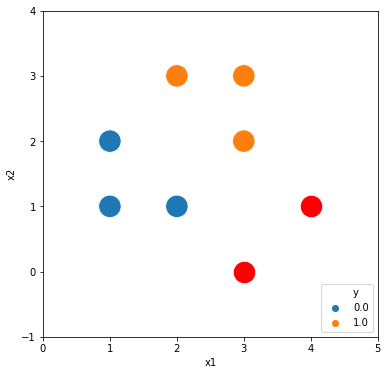

In [3]:
df = pd.DataFrame(x_train, columns=['x1','x2'])
df['y'] = y_train

df_test = pd.DataFrame(x_test, columns=['x1','x2'])
df_test['y'] = y_test

plt.figure(figsize=(6,6))
sns.scatterplot(x='x1', y='x2', hue='y', data=df, s=500)
sns.scatterplot(x='x1', y='x2', color='red', data=df_test, s=500)
plt.xlim(0, 5)
plt.ylim(-1, 4)
plt.legend(loc='lower right')
plt.show()

## Initializing Weights

In [8]:
# Weights
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([2, 1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

print('# Weights: \n', W.numpy(), '\n\n# Bias: \n', b.numpy())

# Weights: 
 [[-0.10099822]
 [ 0.6847899 ]] 

# Bias: 
 [0.38414612]


## Train the model

In [9]:
# Learning Rate
learning_rate = 0.01

# Hypothesis and Prediction Function
def predict(X):
    z = tf.matmul(X, W) + b
    hypothesis = 1 / (1 + tf.exp(-z))
    return hypothesis

# Training
for i in range(2000+1):
    
    with tf.GradientTape() as tape:
        
        hypothesis = predict(x_train)
        cost = tf.reduce_mean(-tf.reduce_sum(y_train*tf.math.log(hypothesis) + (1-y_train)*tf.math.log(1-hypothesis)))        
        W_grad, b_grad = tape.gradient(cost, [W, b])
                
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 400 == 0:
        print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i, W.numpy(), b.numpy(), cost.numpy()))

>>> #0 
 Weights: 
[[-0.11992227]
 [ 0.66358066]] 
 Bias: 
[0.36538637] 
 cost: 4.759439

>>> #400 
 Weights: 
[[0.61899596]
 [0.7487086 ]] 
 Bias: 
[-2.3262427] 
 cost: 2.1940103

>>> #800 
 Weights: 
[[1.058025 ]
 [1.0836021]] 
 Bias: 
[-3.9347079] 
 cost: 1.4598237

>>> #1200 
 Weights: 
[[1.3448476]
 [1.3511039]] 
 Bias: 
[-5.073361] 
 cost: 1.094249

>>> #1600 
 Weights: 
[[1.562529 ]
 [1.5643576]] 
 Bias: 
[-5.95332] 
 cost: 0.8763469

>>> #2000 
 Weights: 
[[1.7395078]
 [1.7401232]] 
 Bias: 
[-6.670953] 
 cost: 0.7315402



## Predict

In [12]:
hypo = predict(x_test)
print("Prob: \n", hypo.numpy())
print("Result: \n", tf.cast(hypo > 0.5, dtype=tf.float32).numpy())

Prob: 
 [[0.18962799]
 [0.8836236 ]]
Result: 
 [[0.]
 [1.]]


In [13]:
def acc(hypo, label):
    predicted = tf.cast(hypo > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
    return accuracy

accuracy = acc(predict(x_test), y_test).numpy()
print("Accuracy: %s" % accuracy)

Accuracy: 1.0
